In [303]:
import pandas as pd

# Step 1: Prepping data for RF Algorithm

In [304]:
df = pd.read_csv('heart.csv')

Checking the database

In [305]:
df.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [306]:
df.shape

(918, 12)

For the sake of this demonstration, this data is already cleaned.

In [307]:
df.isnull().sum()

Age               0
Gender            0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Since we can't directly put texts into a decision tree, we need to convert everything into numbers: all categorical columns will be indexed.

In [308]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [309]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [310]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [311]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [312]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [313]:
df = pd.get_dummies(data=df, columns=['Gender', 'ChestPainType', 'ExerciseAngina', 'RestingECG', 'ST_Slope'])

In [314]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Gender_F,Gender_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,True,False,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,True,False,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,False,True,False,...,False,True,True,False,False,True,False,False,True,False
914,68,144,193,1,141,3.4,1,False,True,True,...,False,False,True,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
916,57,130,236,0,174,0.0,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False


# Step 2: Data visualisation

This is to get a general sense of what the target looks like.

In [315]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [316]:
import seaborn as sns
import matplotlib.pyplot as plt

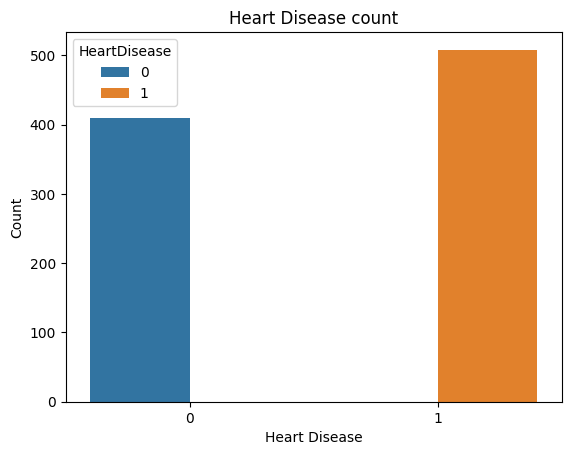

In [317]:
sns.countplot(x='HeartDisease', hue='HeartDisease', data=df)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Heart Disease count')
plt.show()

Selecting every columns except the last as inputs for variables, and the last column is for the target.

In [318]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

The original df has 21 columns

In [319]:
df.shape

(918, 21)

X has the first 20 and y has the last column

In [320]:
X.shape

(918, 20)

In [321]:
y.shape

(918,)

# Step 3: Initiating model

In [322]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

By default, y_test and X_test will have 25% of the initial data.

In [333]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion="gini", max_depth=8, min_samples_split=10)

* I'm using `gini` instead of `entropy` for time saving
* `max_depth` is 8 indicating that each decision tree will only have a maximum decision depth of 8
* `min_samples_split` is the threshold at which the leaf will stop splitting

In [324]:
X_train.dtypes

Age                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
HeartDisease           int64
Gender_F                bool
Gender_M                bool
ChestPainType_ASY       bool
ChestPainType_ATA       bool
ChestPainType_NAP       bool
ChestPainType_TA        bool
ExerciseAngina_N        bool
ExerciseAngina_Y        bool
RestingECG_LVH          bool
RestingECG_Normal       bool
RestingECG_ST           bool
ST_Slope_Down           bool
ST_Slope_Flat           bool
dtype: object

# Step 4: Execution

In [325]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=10)

In [327]:
y_pred = clf.predict(X_test)

In [328]:
y_pred

array([False, False,  True,  True,  True,  True, False,  True, False,
        True,  True, False, False, False, False,  True, False, False,
        True, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False,  True, False,  True, False,
       False, False, False, False,  True, False,  True,  True,  True,
        True, False, False, False, False, False,  True,  True,  True,
       False, False, False,  True, False, False,  True, False, False,
        True,  True,  True,  True, False, False,  True, False, False,
        True, False, False, False, False,  True,  True,  True,  True,
        True, False, False,  True,  True, False,  True,  True, False,
       False,  True,  True, False, False,  True,  True,  True, False,
        True, False, False,  True, False, False,  True, False,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False,  True,

In [329]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[117,   3],
       [  1, 109]])

`[TN, FN`

`FP, TP]`

In [330]:
accuracy_score(y_test, y_pred)

0.9826086956521739

The metrics are all good! That means our model is running as expected.